In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [38]:
valUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=0)
errUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=1)

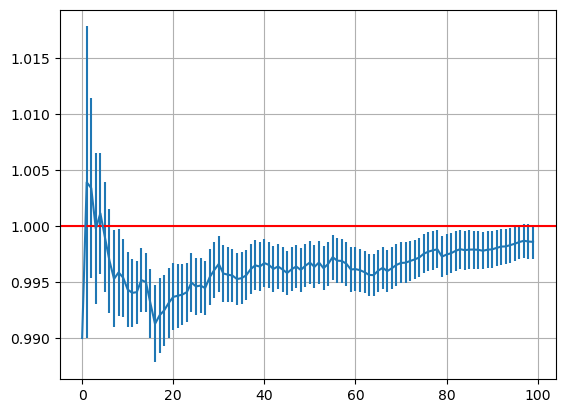

In [39]:
xs = np.arange(len(valUnif))
plt.errorbar(xs, valUnif, yerr=errUnif)
plt.axhline(y=1, color="red")
plt.grid(True)

In [40]:
valMine = np.loadtxt("lsn2.1_mine.dat", usecols=0)
errMine = np.loadtxt("lsn2.1_mine.dat", usecols=1)

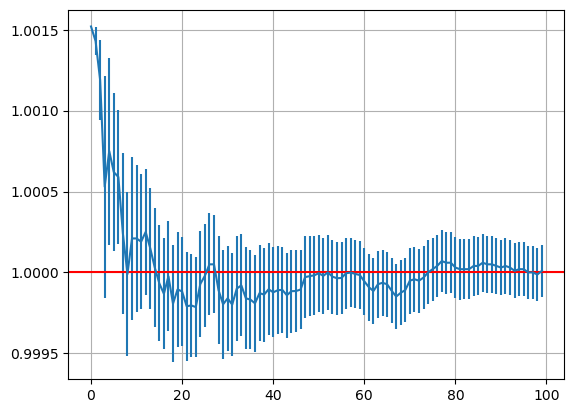

In [41]:
plt.errorbar(xs, valMine, yerr=errMine)
plt.axhline(y=1, color="red")
plt.grid(True)

In [42]:
discreteMeans, discreteErrors = np.loadtxt("discreteRW.dat", unpack=True)

<ErrorbarContainer object of 3 artists>

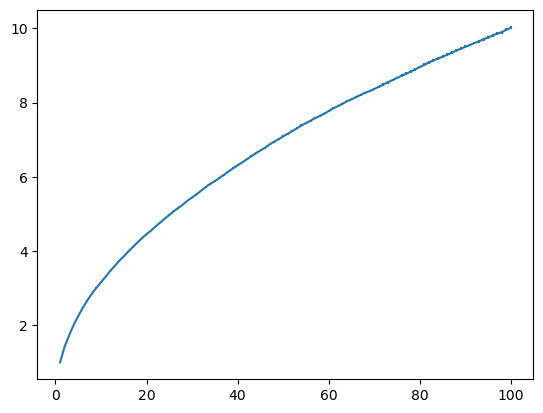

In [43]:
steps = np.arange(1, len(discreteMeans)+1)
plt.errorbar(steps, discreteMeans, yerr=discreteErrors)

In [44]:
def f(N, lam): return lam*np.sqrt(N)

In [45]:
popt, pcov = scipy.optimize.curve_fit(f, steps, discreteMeans)

In [46]:
popt, pcov

(array([1.00101125]), array([[6.83241333e-08]]))

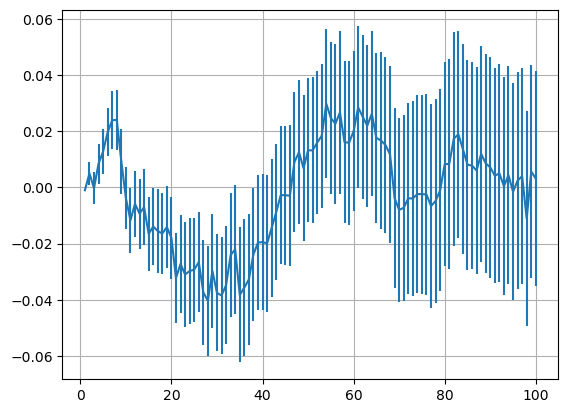

In [47]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps, discreteMeans-fitted_positions, yerr=discreteErrors)
plt.grid()

In [48]:
popt

array([1.00101125])

In [49]:
np.sqrt(pcov)

array([[0.00026139]])

In [50]:
continuousMeans, continuousErrors = np.loadtxt("continuousRW.dat", unpack=True)

<ErrorbarContainer object of 3 artists>

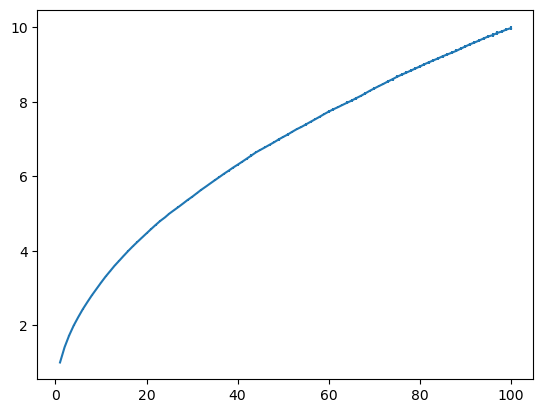

In [51]:
steps = np.arange(1, len(continuousMeans)+1)
plt.errorbar(steps,continuousMeans, yerr=continuousErrors)

In [52]:
def f(N, lam): return lam*np.sqrt(N)

In [53]:
popt, pcov = scipy.optimize.curve_fit(f, steps, continuousMeans)

In [54]:
popt, pcov

(array([0.99922685]), array([[2.8451722e-08]]))

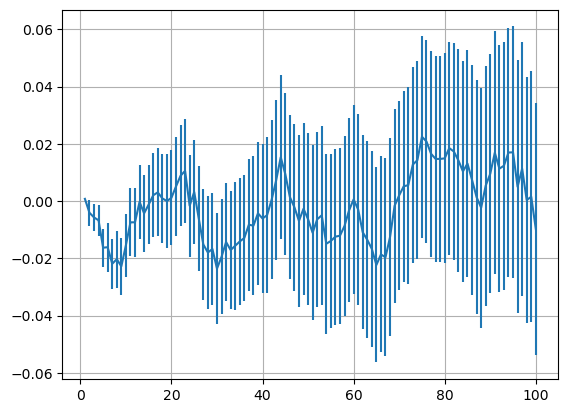

In [55]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps,continuousMeans-fitted_positions, yerr=continuousErrors)
plt.grid()